# 回归(regression)问题

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.15.0


In [2]:
# 使用经典的 Auto MPG 数据集，构建了一个用来预测70年代末到80年代初汽车燃油效率的模型。
# 训练数据为那个时期的汽车描述。这个描述包含：气缸数，排量，马力以及重量。
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/home/sq/.keras/datasets/auto-mpg.data'

In [3]:
raw_dataset = pd.read_csv(dataset_path, 
                          na_values="?", 
                          comment='\t', 
                          sep=" ", 
                          skipinitialspace=True)
# shape = (398, 8)
raw_dataset.head()

,18.0,8,307.0,130.0,3504.,12.0,70,1
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1


In [4]:
column_names = [
    '燃油效率(MPG)',
    '气缸数(Cylinders)',
    '排量(Displacement)',
    '马力(Horsepower)',
    '重量(Weight)',
    '加速度(Acceleration)', 
    '年款(Model Year)', 
    '产地(Origin)'
]
raw_dataset.columns = column_names
# shape = (398, 8)
dataset = raw_dataset.copy()
dataset.tail()

,燃油效率(MPG),气缸数(Cylinders),排量(Displacement),马力(Horsepower),重量(Weight),加速度(Acceleration),年款(Model Year),产地(Origin)
392,27.0,4,140.0,86.0,2790.0,15.6,82,1
393,44.0,4,97.0,52.0,2130.0,24.6,82,2
394,32.0,4,135.0,84.0,2295.0,11.6,82,1
395,28.0,4,120.0,79.0,2625.0,18.6,82,1
396,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
# 查看存在列属性缺失的数据行
dataset.isna().sum()

燃油效率(MPG)            0
气缸数(Cylinders)       0
排量(Displacement)     0
马力(Horsepower)       6
重量(Weight)           0
加速度(Acceleration)    0
年款(Model Year)       0
产地(Origin)           0
dtype: int64

In [6]:
# 为了保证这个初始示例的简单性，删除这些行。
dataset = dataset.dropna()
dataset.shape

(391, 8)

In [7]:
# "Origin" 列实际上代表分类，而不仅仅是一个数字。所以把它转换为独热码(one-hot), 即分成3列
origin = dataset.pop('产地(Origin)')
origin, type(origin)

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 392    1
 393    2
 394    1
 395    1
 396    1
 Name: 产地(Origin), Length: 391, dtype: int64, pandas.core.series.Series)

In [8]:
dataset['USA'] = (origin == 1) * 1.0
dataset['Europe'] = (origin == 2) * 1.0
dataset['Japan'] = (origin == 3) * 1.0
dataset.tail()

,燃油效率(MPG),气缸数(Cylinders),排量(Displacement),马力(Horsepower),重量(Weight),加速度(Acceleration),年款(Model Year),USA,Europe,Japan
392,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
393,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
394,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
395,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
396,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [9]:
# 拆分 训练集 和 测试集
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
print(f"train dataset shape: {train_dataset.shape}")
print(f"test dataset shape: {test_dataset.shape}")

train dataset shape: (313, 10)
test dataset shape: (78, 10)


/home/sq/miniconda3/envs/nlpqs/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29123 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sq/miniconda3/envs/nlpqs/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sq/miniconda3/envs/nlpqs/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sq/miniconda3/envs/nlpqs/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sq/miniconda3/envs/nlpqs/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sq/miniconda3/envs/nlpqs/lib/python3.7/

/home/sq/miniconda3/envs/nlpqs/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 29123 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sq/miniconda3/envs/nlpqs/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 27833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sq/miniconda3/envs/nlpqs/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25928 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sq/miniconda3/envs/nlpqs/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sq/miniconda3/envs/nlpqs/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 27668 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sq/miniconda3/envs/nlpqs/lib/python3.7/site-packa

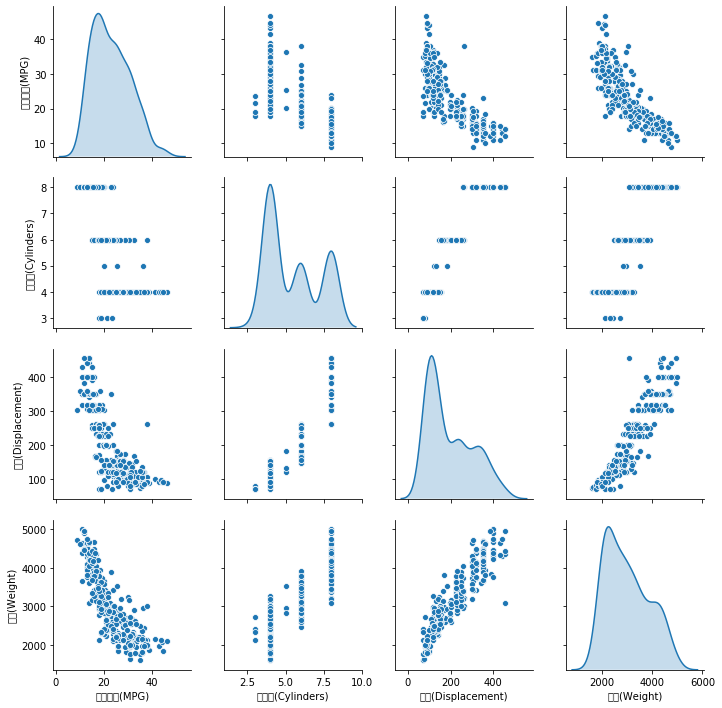

In [10]:
# [
#     '燃油效率(MPG)',
#     '气缸数(Cylinders)',
#     '排量(Displacement)',
#     '马力(Horsepower)',
#     '重量(Weight)',
#     '加速度(Acceleration)', 
#     '年款(Model Year)', 
#     '产地(Origin)'
# ]
l_select_col = [
    '燃油效率(MPG)',
    '气缸数(Cylinders)',
    '排量(Displacement)',
    '重量(Weight)',
]
sns.pairplot(train_dataset[l_select_col], diag_kind="kde")

In [11]:
# [
#     '燃油效率(MPG)',
#     '气缸数(Cylinders)',
#     '排量(Displacement)',
#     '马力(Horsepower)',
#     '重量(Weight)',
#     '加速度(Acceleration)', 
#     '年款(Model Year)', 
#     '产地(Origin)'
# ]
train_stats = train_dataset.describe()
train_stats.pop("燃油效率(MPG)")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
气缸数(Cylinders),313.0,5.498403,1.706181,3.0,4.0,4.0,8.0,8.0
排量(Displacement),313.0,197.701278,105.981453,70.0,107.0,151.0,302.0,455.0
马力(Horsepower),313.0,105.945687,39.117758,46.0,76.0,95.0,130.0,230.0
重量(Weight),313.0,3011.108626,851.750295,1613.0,2255.0,2870.0,3651.0,4997.0
加速度(Acceleration),313.0,15.463259,2.707970,8.0,13.7,15.5,17.0,24.8
年款(Model Year),313.0,75.910543,3.669650,70.0,73.0,76.0,79.0,82.0
USA,313.0,0.629393,0.483741,0.0,0.0,1.0,1.0,1.0
Europe,313.0,0.172524,0.378440,0.0,0.0,0.0,0.0,1.0
Japan,313.0,0.198083,0.399193,0.0,0.0,0.0,0.0,1.0


In [12]:
train_labels = train_dataset.pop('燃油效率(MPG)')
test_labels = test_dataset.pop('燃油效率(MPG)')

In [13]:
# 归一化 训练集 和 测试集 数据
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
print(normed_train_data.head())
print()
print("---" * 30)
print()
print(normed_test_data.tail())

     气缸数(Cylinders)  排量(Displacement)  马力(Horsepower)  重量(Weight)  \
55        -0.878220         -1.006792       -0.918910   -1.239928   
126        0.293988          0.323629       -0.151995   -0.129273   
355       -0.878220         -0.846387       -0.791091   -0.776177   
177       -0.878220         -0.733159       -0.458761   -0.063526   
286        1.466197          1.446467        0.819431    1.108179   

     加速度(Acceleration)  年款(Model Year)       USA    Europe     Japan  
55            1.859969       -1.338150  0.766127 -0.455882 -0.496208  
126           0.198208       -0.520634  0.766127 -0.455882 -0.496208  
355           0.493632        1.386905 -1.301096 -0.455882  2.008844  
177           0.567488       -0.248128 -1.301096  2.186544 -0.496208  
286          -0.835777        0.841894  0.766127 -0.455882 -0.496208  

------------------------------------------------------------------------------------------

     气缸数(Cylinders)  排量(Displacement)  马力(Horsepower)  重量(Weight) 

In [14]:
def build_model():
    # 设计模型结构
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    # 选择优化器
    optimizer = keras.optimizers.RMSprop(0.001)
    # 配置模型训练参数
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

print(train_dataset.keys())
print(len(train_dataset.keys()))

Index(['气缸数(Cylinders)', '排量(Displacement)', '马力(Horsepower)', '重量(Weight)',
       '加速度(Acceleration)', '年款(Model Year)', 'USA', 'Europe', 'Japan'],
      dtype='object')
9


In [15]:
model = build_model()
print(f"train dataset shape: {normed_train_data.shape}")
print(f"test dataset shape: {normed_test_data.shape}")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
train dataset shape: (313, 9)
test dataset shape: (78, 9)


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 试用为训练的模型
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.03643379],
       [ 0.06280639],
       [ 0.02975245],
       [ 0.10751779],
       [ 0.49004906],
       [-0.1350233 ],
       [ 0.14661008],
       [ 0.39412102],
       [ 0.04438309],
       [ 0.02984173]], dtype=float32)

In [18]:
# 通过为每个完成的时期打印一个点来显示训练进度
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: 
            print('\n')
            pass
        print('*', end=' ')
        pass
    pass

num_epoch = 1000
history = model.fit(normed_train_data, 
                    train_labels, 
                    epochs=num_epoch, 
                    validation_split=0.2, 
                    verbose=0, 
                    callbacks=[PrintDot()])



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

In [19]:
# 可视化模型训练过程的状态表换
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.083226,0.917069,2.083226,13.109672,2.208328,13.109673,995
996,1.772196,0.846257,1.772196,13.052432,2.251672,13.052432,996
997,2.092477,0.889637,2.092477,12.814334,2.252580,12.814335,997
998,1.797951,0.832517,1.797951,13.446705,2.310642,13.446705,998
999,1.850836,0.855799,1.850836,12.884024,2.190824,12.884024,999


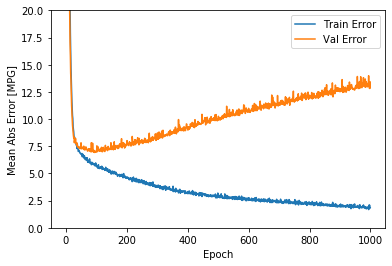

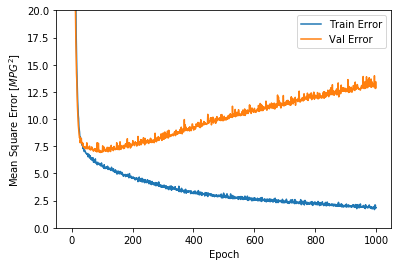

In [20]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

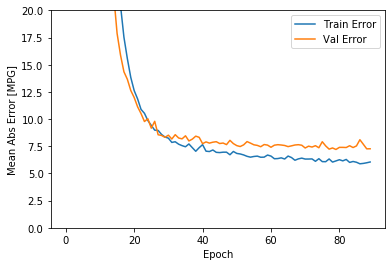

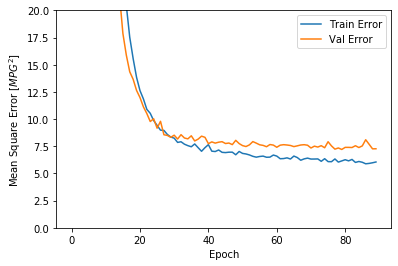

In [21]:
model = build_model()

# patience 值用来检查改进 epochs 的数量
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

num_epoch = 1000
history = model.fit(normed_train_data, 
                    train_labels, 
                    epochs=num_epoch, 
                    validation_split=0.2, 
                    verbose=0, 
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [22]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 6.3529 - mean_absolute_error: 1.9390 - mean_squared_error: 6.3529
Testing set Mean Abs Error:  1.94 MPG


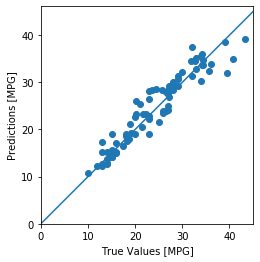

In [23]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


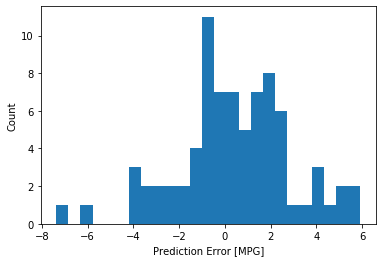

In [24]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")